B:\AC\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
B:\AC\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
B:\AC\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
B:\AC\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
B:\AC\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
B:\AC\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at thi

Best parameters:
RSI window: 5
SMA window: 12
Bollinger Bands window: 12
Epoch 1/50
14/14 [==============================] - 5s 71ms/step - loss: 0.0616 - val_loss: 0.0312
Epoch 2/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0276 - val_loss: 0.0373
Epoch 3/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0255 - val_loss: 0.0353
Epoch 4/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0238 - val_loss: 0.0348
Epoch 5/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0212 - val_loss: 0.0332
Epoch 6/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0199 - val_loss: 0.0333
Epoch 7/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0186 - val_loss: 0.0311
Epoch 8/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0184 - val_loss: 0.0264
Epoch 9/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0160 - val_loss: 0.0301
Epoch 10/50
14/14 [=================

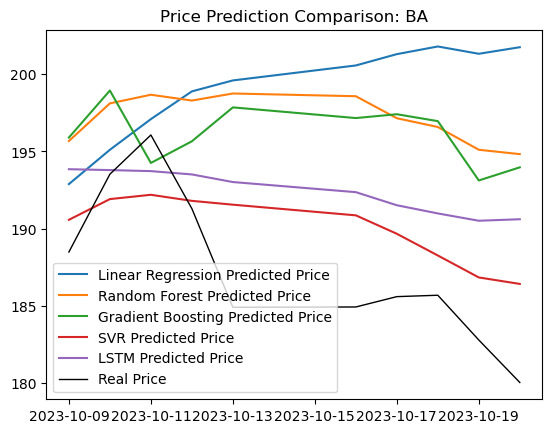

Real Prices: [188.49000549 193.52999878 196.07000732 191.30000305 184.91000366
 184.92999268 185.6000061  185.69000244 182.78999329 180.03999329]
Linear Regression Predicted Prices: [192.88882148 195.11122444 197.09720156 198.89403799 199.60331553
 200.5726615  201.30558163 201.80207591 201.32922421 201.75479074]
Random Forest Predicted Prices: [195.67744705 198.11604935 198.67599899 198.30014969 198.75675301
 198.58045113 197.15514999 196.58690323 195.1116478  194.8301973 ]
Gradient Boosting Predicted Prices: [195.90272692 198.94859476 194.2593306  195.66081648 197.85716963
 197.16581462 197.41417957 196.96622292 193.12403872 193.97396716]
SVR Predicted Prices: [190.57465057 191.91765524 192.1960742  191.80322033 191.55611692
 190.86475154 189.67072194 188.26581995 186.84243288 186.42300287]
LSTM Predicted Prices: [193.8535209  193.79575682 193.7293259  193.51517032 193.02209115
 192.3667221  191.51964757 190.98903211 190.51560627 190.61235703]
1/1 [==============================] - 0

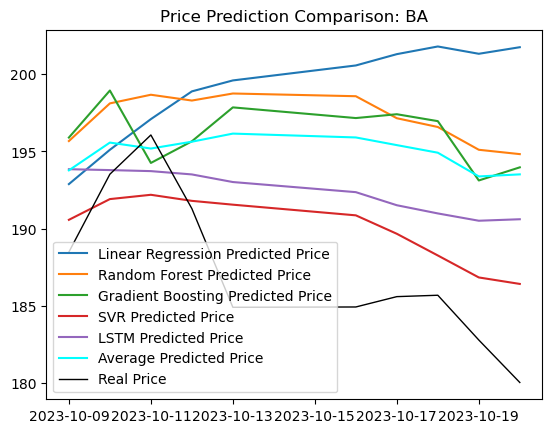

Real Prices: [188.49000549 193.52999878 196.07000732 191.30000305 184.91000366
 184.92999268 185.6000061  185.69000244 182.78999329 180.03999329]
Linear Regression Predicted Prices: [0.05078125, 0.0966796875, 0.1376953125, 0.1748046875, 0.189453125, 0.20947265625, 0.224609375, 0.23486328125, 0.22509765625, 0.23388671875]
Random Forest Predicted Prices: [0.10837366627442994, 0.15873718586662122, 0.17030161153188472, 0.1625393397439977, 0.17196939324743638, 0.1683282980183747, 0.13889209940332548, 0.12715631651295436, 0.09668843086623365, 0.09087574143135074]
Gradient Boosting Predicted Prices: [0.11302628516598484, 0.17593142758195143, 0.07908585016286426, 0.10803020143302992, 0.15339064215304068, 0.13911235186907786, 0.14424173811418126, 0.13499026088957272, 0.055639101564274186, 0.07319234815022058]
SVR Predicted Prices: [0.0029875640776402257, 0.030724125402881608, 0.03647420564217674, 0.0283607450005241, 0.023257412887770723, 0.00897890831762771, -0.015680927737010908, -0.0446958307

C:\Users\jizha\AppData\Local\Temp\ipykernel_10496\976319730.py:227: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  random_dates = random.sample(list(historical_data['2023'].index), 5)


1/1 [==============================] - 0s 16ms/step
Average MSE for each model over 5 random periods:
Linear Regression: 219.05
Random Forest: 216.34
Gradient Boosting: 254.06
SVR: 447.85
LSTM: 374.45

The best model based on the average MSE over 5 random periods is: Random Forest with an average error of 216.34.


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from datetime import datetime
 
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

def compute_rsi(data, window):
    delta = data.diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    
    roll_up = up.rolling(window=window).mean()
    roll_down = down.abs().rolling(window=window).mean()
    
    RS = roll_up / roll_down
    RSI = 100.0 - (100.0 / (1.0 + RS))
    
    return RSI

def compute_bollinger_bands(data, window):
    sma = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = sma + (rolling_std*2)
    lower_band = sma - (rolling_std*2)
    
    return upper_band, lower_band

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def get_data(ticker_symbol, start_date, end_date):
    ticker_data = yf.Ticker(ticker_symbol)
    historical_data = ticker_data.history(start=start_date, end=end_date)
    return historical_data[['Close', 'Volume']].copy()
def mean_absolute_percentage_error(y_true, y_pred, epsilon=1e-10):
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

#{'RSI_window': 20, 'SMA_window': 9, 'Bollinger_window': 23}
ticker_symbol = 'BA'
ticker_data = yf.Ticker(ticker_symbol)
start_date = '2023-01-01'
end_date = '2023-10-01'
historical_data = ticker_data.history(start=start_date, end=end_date)
data = historical_data[['Close', 'Volume']].copy()
# 评估函数
def evaluate_parameters(rsi_window, sma_window, bollinger_window):
    data = get_data(ticker_symbol, start_date, end_date)
    
    data['RSI'] = compute_rsi(data['Close'], rsi_window)
    data['SMA'] = data['Close'].rolling(window=sma_window).mean()
    data['Upper_Band'], data['Lower_Band'] = compute_bollinger_bands(data, bollinger_window)
    
    data.dropna(inplace=True)
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)
    
    look_back = 10
    X, y = create_dataset(data_scaled, look_back)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    
    model = LinearRegression()
    model.fit(X_train[:, -1, :], y_train)
    y_pred = model.predict(X_test[:, -1, :])
    y_real = y_test
    
    mape = mean_absolute_percentage_error(y_real, y_pred)
    
    return mape
# 定义搜索空间
space  = [Integer(5, 20, name='rsi_window'),
          Integer(3, 15, name='sma_window'),
          Integer(10, 30, name='bollinger_window')]
# 使用贝叶斯优化
@use_named_args(space)
def objective(**params):
    return evaluate_parameters(params['rsi_window'], params['sma_window'], params['bollinger_window'])
res = gp_minimize(objective, space, n_calls=50, random_state=0)
# 获取最佳参数
best_rsi_window = res.x[0]
best_sma_window = res.x[1]
best_bollinger_window = res.x[2]
#  输出最佳参数
print("Best parameters:")
print("RSI window:", res.x[0])
print("SMA window:", res.x[1])
print("Bollinger Bands window:", res.x[2])
data = historical_data[['Close', 'Volume']].copy()
# 使用优化后的参数更新技术指标
data['RSI'] = compute_rsi(data['Close'], best_rsi_window)
data['SMA'] = data['Close'].rolling(window=best_sma_window).mean()
data['Upper_Band'], data['Lower_Band'] = compute_bollinger_bands(data, best_bollinger_window)

data.dropna(inplace=True)


# 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 使用滑动窗口法创建数据集
look_back = 10
X, y = create_dataset(data_scaled, look_back)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# 创建和训练模型
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=24),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=24),
    "SVR": SVR(kernel='rbf', C=1e3, gamma=0.1),
    "LSTM": Sequential([
        LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
        Dropout(0.2),
        LSTM(50, return_sequences=True),
        Dropout(0.2),
        LSTM(25),
        Dense(1)
    ])
}
models["LSTM"].compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
models["Linear Regression"].fit(X_train[:, -1, :], y_train)
models["Random Forest"].fit(X_train[:, -1, :], y_train)
models["Gradient Boosting"].fit(X_train[:, -1, :], y_train)
models["SVR"].fit(X_train[:, -1, :], y_train)
models["LSTM"].fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1, shuffle=False)

# 获取真实的股价数据
real_data = ticker_data.history(start='2023-10-09', end=datetime.today().strftime('%Y-%m-%d'))
real_prices = real_data['Close'].values
num_points = min(len(real_prices), 10)
def predict_future(model, initial_input, steps, is_lstm=False):
    future_predictions = []
    current_input = initial_input.copy()
    
    for i in range(steps):
        if is_lstm:
            current_prediction = model.predict(current_input[np.newaxis, :, :])[0, 0]
            future_predictions.append(current_prediction)
            current_input = np.roll(current_input, -1, axis=0)
            current_input[-1, 0] = current_prediction
        else:
            current_prediction = model.predict(current_input[-1, :].reshape(1, -1))
            future_predictions.append(current_prediction[0])
            current_input = np.roll(current_input, -1, axis=0)
            current_input[-1, 0] = current_prediction[0]
    
    return future_predictions

# 预测股价
predictions = {}
for model_name, model in models.items():
    if model_name == "LSTM":
        predictions[model_name] = predict_future(model, data_scaled[-look_back:, :], num_points, is_lstm=True)
    else:
        predictions[model_name] = predict_future(model, data_scaled[-look_back:, :], num_points, is_lstm=False)
    
    predicted_prices = scaler.inverse_transform(np.hstack([np.array(predictions[model_name]).reshape(-1, 1), np.zeros((len(predictions[model_name]), data.shape[1]-1))]))[:, 0]
    plt.plot(real_data.index[:num_points], predicted_prices, label=f'{model_name} Predicted Price')

# 绘制真实股价
plt.plot(real_data.index[:num_points], real_prices[:num_points], label='Real Price', color='black', linewidth=1)
plt.legend()
plt.title(f'Price Prediction Comparison: {ticker_symbol}')
plt.show()

# 打印真实价格和预测价格
print(f"Real Prices: {real_prices[:num_points]}")
for model_name, prediction in predictions.items():
    predicted_prices = scaler.inverse_transform(np.hstack([np.array(prediction).reshape(-1, 1), np.zeros((len(prediction), data.shape[1]-1))]))[:, 0]
    print(f"{model_name} Predicted Prices: {predicted_prices}")
# 获取每个模型的预测结果
all_predictions = []

for model_name, model in models.items():
    if model_name == "LSTM":
        predictions[model_name] = predict_future(model, data_scaled[-look_back:, :], num_points, is_lstm=True)
    else:
        predictions[model_name] = predict_future(model, data_scaled[-look_back:, :], num_points, is_lstm=False)
    
    predicted_prices = scaler.inverse_transform(np.hstack([np.array(predictions[model_name]).reshape(-1, 1), np.zeros((len(predictions[model_name]), data.shape[1]-1))]))[:, 0]
    all_predictions.append(predicted_prices)
    plt.plot(real_data.index[:num_points], predicted_prices, label=f'{model_name} Predicted Price')

# 计算平均预测值
average_prediction = np.mean(all_predictions, axis=0)
predictions["Average"] = average_prediction
plt.plot(real_data.index[:num_points], average_prediction, label='Average Predicted Price', color='cyan', linewidth=1.5)

plt.plot(real_data.index[:num_points], real_prices[:num_points], label='Real Price', color='black', linewidth=1)
plt.legend()
plt.title(f'Price Prediction Comparison: {ticker_symbol}')
plt.show()

print(f"Real Prices: {real_prices[:num_points]}")
for model_name, prediction in predictions.items():
    if model_name in models or model_name == "Average":
        print(f"{model_name} Predicted Prices: {prediction}")
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
import random

from sklearn.metrics import mean_squared_error

# 定义函数计算预测误差
def compute_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# 从2023年随机选择5个10日时间段
random_dates = random.sample(list(historical_data['2023'].index), 5)

model_errors = {}

for start_date in random_dates:
    end_date = start_date + pd.Timedelta(days=10)
    
    real_data = ticker_data.history(start=start_date, end=end_date)
    real_prices = real_data['Close'].values
    num_points = len(real_prices)
    
    for model_name, model in models.items():
        if model_name == "LSTM":
            predicted = predict_future(model, data_scaled[-look_back:, :], num_points, is_lstm=True)
        else:
            predicted = predict_future(model, data_scaled[-look_back:, :], num_points, is_lstm=False)
        
        predicted_prices = scaler.inverse_transform(np.hstack([np.array(predicted).reshape(-1, 1), np.zeros((len(predicted), data.shape[1]-1))]))[:, 0]
        error = compute_mse(real_prices, predicted_prices)
        
        if model_name not in model_errors:
            model_errors[model_name] = []
        model_errors[model_name].append(error)

avg_errors = {model_name: np.mean(errors) for model_name, errors in model_errors.items()}
best_model_name = min(avg_errors, key=avg_errors.get)

print(f"Average MSE for each model over 5 random periods:")
for model_name, error in avg_errors.items():
    print(f"{model_name}: {error:.2f}")
    
print(f"\nThe best model based on the average MSE over 5 random periods is: {best_model_name} with an average error of {avg_errors[best_model_name]:.2f}.")

In [4]:

# 从2023年随机选择5个10日时间段
random_dates = random.sample(list(historical_data['2023'].index), 5)

model_errors = {}
model_slope_errors = {}

def compute_slope(data):
    return np.diff(data)

for start_date in random_dates:
    end_date = start_date + pd.Timedelta(days=10)
    
    real_data = ticker_data.history(start=start_date, end=end_date)
    real_prices = real_data['Close'].values
    real_slopes = compute_slope(real_prices)
    num_points = len(real_prices)
    
    for model_name, model in models.items():
        if model_name == "LSTM":
            predicted = predict_future(model, data_scaled[-look_back:, :], num_points, is_lstm=True)
        else:
            predicted = predict_future(model, data_scaled[-look_back:, :], num_points, is_lstm=False)
        
        predicted_prices = scaler.inverse_transform(np.hstack([np.array(predicted).reshape(-1, 1), np.zeros((len(predicted), data.shape[1]-1))]))[:, 0]
        error = compute_mse(real_prices, predicted_prices)
        predicted_slopes = compute_slope(predicted_prices)
        slope_error = compute_mse(real_slopes, predicted_slopes)
        
        if model_name not in model_errors:
            model_errors[model_name] = []
            model_slope_errors[model_name] = []
        model_errors[model_name].append(error)
        model_slope_errors[model_name].append(slope_error)

avg_errors = {model_name: np.mean(errors) for model_name, errors in model_errors.items()}
avg_slope_errors = {model_name: np.mean(errors) for model_name, errors in model_slope_errors.items()}

# Combine the two errors for final evaluation
combined_errors = {model_name: avg_errors[model_name] + avg_slope_errors[model_name] for model_name in models.keys()}
best_model_name = min(combined_errors, key=combined_errors.get)

print(f"Average MSE for each model over 5 random periods:")
for model_name, error in avg_errors.items():
    print(f"{model_name}: {error:.2f}")
print("\nAverage Slope MSE for each model over 5 random periods:")
for model_name, error in avg_slope_errors.items():
    print(f"{model_name}: {error:.2f}")
print(f"\nThe best model based on combined errors is: {best_model_name}.")


C:\Users\jizha\AppData\Local\Temp\ipykernel_10496\156075387.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  random_dates = random.sample(list(historical_data['2023'].index), 5)


1/1 [==============================] - 0s 21ms/step
Average MSE for each model over 5 random periods:
Linear Regression: 97.36
Random Forest: 90.65
Gradient Boosting: 103.19
SVR: 207.06
LSTM: 162.84

Average Slope MSE for each model over 5 random periods:
Linear Regression: 21.45
Random Forest: 20.66
Gradient Boosting: 21.41
SVR: 19.67
LSTM: 18.63

The best model based on combined errors is: Random Forest.


In [5]:
def evaluate_models(predictions, real_prices):
    evaluation_results = {}
    
    for model_name, predicted_prices in predictions.items():
        # Calculate price difference
        price_diff = np.abs(predicted_prices - real_prices)
        
        # Calculate the slope (first order difference) for predicted and real prices
        predicted_slope = np.diff(predicted_prices)
        real_slope = np.diff(real_prices)
        
        # Calculate slope difference
        slope_diff = np.abs(predicted_slope - real_slope)
        
        # Store the results
        evaluation_results[model_name] = {
            'Average Price Difference': np.mean(price_diff),
            'Average Slope Difference': np.mean(slope_diff)
        }
    
    return evaluation_results

evaluation_results = evaluate_models(predictions, real_prices[:num_points])
evaluation_results

ValueError: operands could not be broadcast together with shapes (10,) (8,) 